# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## Problem Definition
- 50% of the world’s population is in danger from malaria
- Children under age of 5 accounted for 67% of malaria related death in 2019
- Traditional diagnosis is tedious and time consuming accuracy is highly subjective

###<b> Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
import os
import cv2
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread



### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
dir_name = "/content/drive/MyDrive/malaria_cells/cell_images"
train_dir = f"{dir_name}/train"
test_dir = f"{dir_name}/test"

# Target image size
TARGET_IMAGE_SIZE = (224, 224)

# Function to read images from directory into array
def read_image(image_path):
    return cv2.imread(image_path, 1)

# Function to resize image into the chosen target size
def resize_image_in_place(image_list, target_image_size):
    for i in range(len(image_list)):
        image_list[i] = cv2.resize(image_list[i] , (target_image_size[0], target_image_size[1]), interpolation = cv2.INTER_LINEAR)

# Function to precalculate minimum pixel value in the image for future analysis
def get_min(list_of_numpy_arrays):
    min = sys.maxsize
    for n in list_of_numpy_arrays:
        min = np.min([min, np.min([n.shape[0],n.shape[1]])])
    return min

# Function to precalculate maximum pixel value in the image for future analysis
def get_max(list_of_numpy_arrays):
    max = -1
    for n in list_of_numpy_arrays:
        max = np.max([max, np.max((n.shape[0], n.shape[1]))])
    return max

# Parasitized images dataset
# Read image files into a list
X_tr_p = [read_image( f"{train_dir}/parasitized/{file.name}") for file in os.scandir(f"{train_dir}/parasitized") if os.path.isfile(f"{train_dir}/parasitized/{file.name}")]

# Precalculate Min annd Max Pixel
max_tr_p = get_max(X_tr_p)

min_tr_p = get_min(X_tr_p)


# Resize images
resize_image_in_place(X_tr_p, TARGET_IMAGE_SIZE)

# Labels for parasitized images
Y_tr_p = [1] * len(X_tr_p)

# Uninfected images dataset
# Read image into a list
X_tr_u = [read_image( f"{train_dir}/uninfected/{file.name}") for file in os.scandir(f"{train_dir}/uninfected") if os.path.isfile(f"{train_dir}/uninfected/{file.name}")]

# Precalculate Min annd Max Pixel
max_tr_u = get_max(X_tr_u)

min_tr_u = get_min(X_tr_u)

# Resize images
resize_image_in_place(X_tr_u, TARGET_IMAGE_SIZE)

# Labels for uninfected images
Y_tr_u = [0] * len(X_tr_u)

X_train_list = X_tr_p + X_tr_u
Y_train_list = Y_tr_p + Y_tr_u


# Parasitized test images dataset
# Read image files into a list
X_ts_p = [read_image( f"{test_dir}/parasitized/{file.name}") for file in os.scandir(f"{test_dir}/parasitized") if os.path.isfile(f"{test_dir}/parasitized/{file.name}")]

# Precalculate Min annd Max Pixel
max_ts_p = get_max(X_ts_p)

min_ts_p = get_min(X_ts_p)

resize_image_in_place(X_ts_p, TARGET_IMAGE_SIZE)
# Labels for test parasitized images
Y_ts_p = [1] * len(X_ts_p)

# Uninfected test images dataset
# Read image files into a list
X_ts_u = [read_image( f"{test_dir}/uninfected/{file.name}") for file in os.scandir(f"{test_dir}/uninfected") if os.path.isfile(f"{test_dir}/uninfected/{file.name}")]

# Precalculate Min annd Max Pixel
max_ts_u = get_max(X_ts_u)

min_ts_u = get_min(X_ts_u)

resize_image_in_place(X_ts_u, TARGET_IMAGE_SIZE)
# Labels for test uninfected images
Y_ts_u = [0] * len(X_ts_u)

X_test = X_ts_p + X_ts_u
Y_test = Y_ts_p + Y_ts_u

random.seed(67)

# Shuffle Train and Test data
randomize = list(range(len(Y_train_list)))
random.shuffle(randomize)

# Function to shuffle list
def apply_shuffling_in_place(arr, new_indices):
    return [arr[i] for i in new_indices]

X_train_list = apply_shuffling_in_place(X_train_list, randomize)
Y_train_list = apply_shuffling_in_place(Y_train_list, randomize)


###<b> Check the shape of train and test images

In [ ]:
# Convert train and test dataset into numpy array
X_train = np.array(X_train_list)
X_test = np.array(X_test)

print(f"Train image shape: {X_train.shape}")
print(f"Test image shape: {X_test.shape}")

Train image shape: (24958, 224, 224, 3)
Test image shape: (2600, 224, 224, 3)


###<b> Check the shape of train and test labels

In [ ]:
# Convert train and test labels into numpy array
Y_train = np.array(Y_train_list)
Y_test = np.array(Y_test)

print(f"Train label shape: {Y_train.shape}")
print(f"Test label shape: {Y_test.shape}")

Train label shape: (24958,)
Test label shape: (2600,)


####<b> Observations and insights:
The Shape of images in Training dataset is (24958, 224, 224, 3) while the shape of the images in Test dataset is (2600, 224, 224, 3)

The Shape of labels in Test dataset is (24958,) while the shape of the labels in Test dataset is (2600,)


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Max Pixel in train images
max_tr = max(max_tr_p, max_tr_u)

# Min Pixel in train images
min_tr = min(min_tr_p, min_tr_u)

print(f"Minimum value of pixel dimension in training dataset is: {min_tr}")
print(f"Maximum value of pixel dimension in training dataset is: {max_tr}\n")

# Max Pixel in train images
max_ts = max(max_ts_p, max_ts_u)

# Min Pixel in train images
min_ts = min(min_ts_p, min_ts_u)

print(f"Minimum value of pixel dimension in test dataset is: {min_ts}")
print(f"Maximum value of pixel dimension in test dataset is: {max_ts}")


Minimum value of pixel dimension in training dataset is: 40
Maximum value of pixel dimension in training dataset is: 394

Minimum value of pixel dimension in test dataset is: 61
Maximum value of pixel dimension in test dataset is: 241


####<b> Observations and insights:
Minimum value of pixel dimension in training dataset is: 40
Maximum value of pixel dimension in training dataset is: 394

Minimum value of pixel dimension in test dataset is: 61
Maximum value of pixel dimension in test dataset is: 241



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Count of all parasitized cells in the dataset
parasitized_count = len(X_tr_p) + len(X_ts_p)

# Count of all uninfected cells in the dataset
uninfected_count = len(X_tr_u) + len(X_ts_u)

print(f"Total number of parasitized cells is: {parasitized_count}")
print(f"Total number of uninfected cells is: {uninfected_count}")


Total number of parasitized cells is: 13882
Total number of uninfected cells is: 13676


###<b>Normalize the images

In [ ]:
# X_train_normalized = X_train.astype("float32") / 255.0
# X_test_normalized = X_test.astype("float32") / 255.0

####<b> Observations and insights:
It is important to normalize the each pixel from the RGB format initially ranging from 0 to 255, into another format which is 0.0 to 1.0. This is to prevent exploding and vanishing gradient during training. This step can also be included at the model building phase, which allows us to do further analysis on the current RGB format.

###<b> Plot to check if the data is balanced

<Axes: xlabel='label', ylabel='count'>

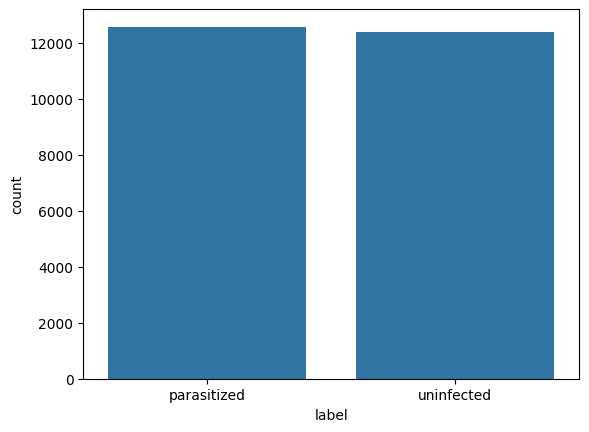

In [ ]:
d = {"class": pd.concat([pd.Series(Y_tr_p), pd.Series(Y_tr_u)]),
     "label":["parasitized" for _ in list(range(0, len(Y_tr_p)))] + ["uninfected" for _ in list(range(0, len(Y_tr_u)))]}
df = pd.DataFrame(d)
sns.countplot(df, x="label")

####<b> Observations and insights:
The data overall seems to be balanced with parasitized cells at 13882, then total count of uninfected cells is 13676. The difference in the count of the cells is not very significant.

### <b>Data Exploration</b>
Let's visualize the images from the train data

####<b> Observations and insights: _____
Sample images from the train data are plotted below, and it is clear that the parasitized cells have a noticeable stain on them, these spots have colors that appaear to be pink, purple or red.



###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

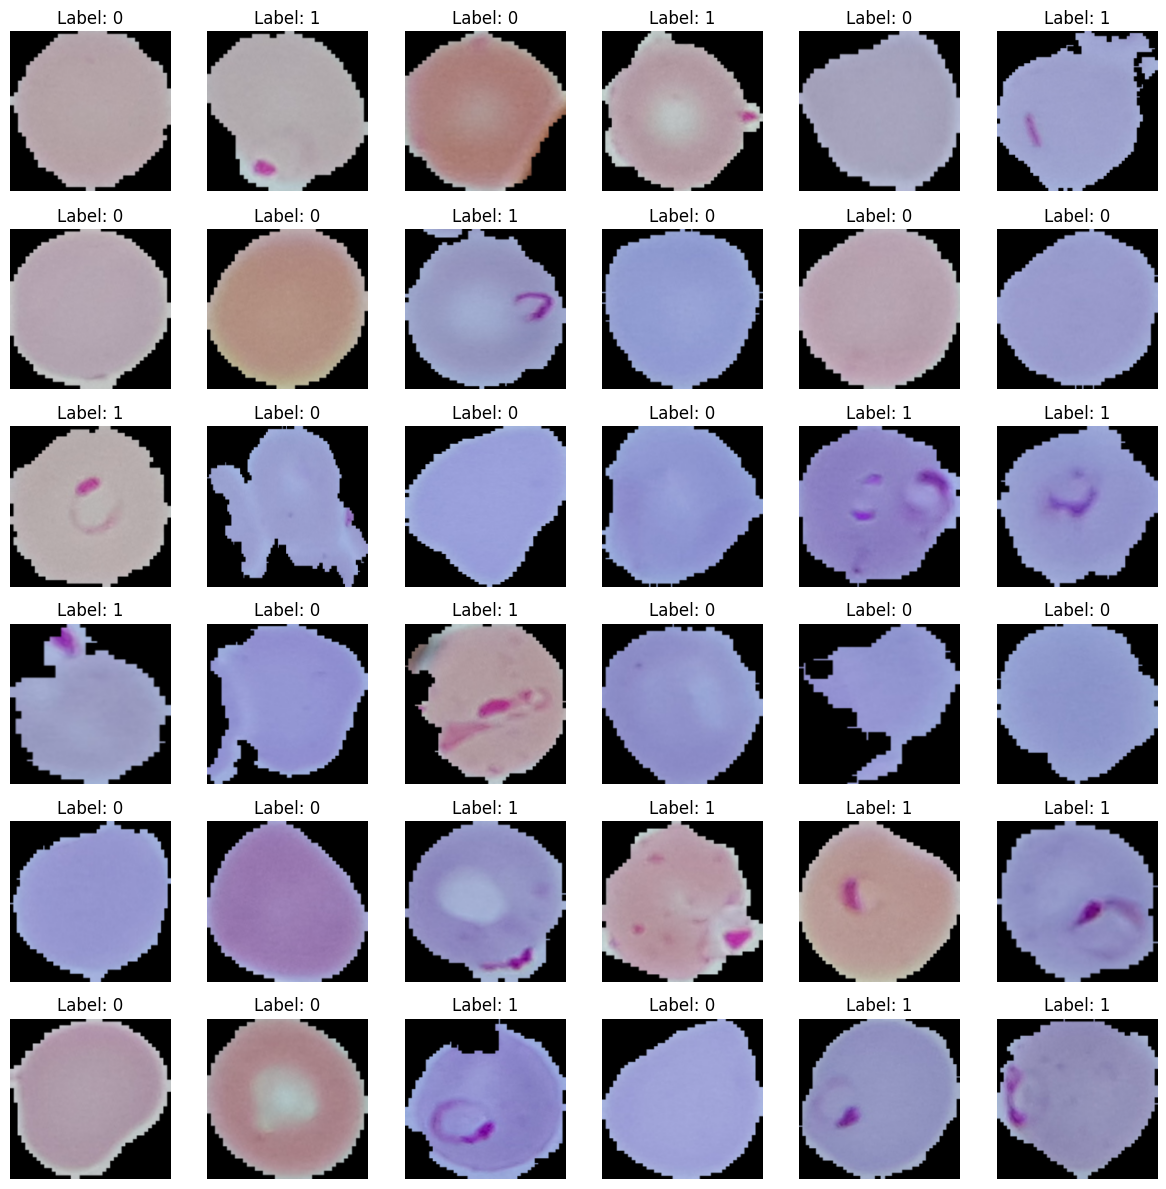

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure with the desired size
fig, axes = plt.subplots(6, 6, figsize=(12, 12))

# Flatten the axes array so that we can easily iterate over it
axes = axes.flatten()

# Loop through each image and display it
for i, ax in enumerate(axes):
    # Plot the image
    ax.imshow(X_train[i])
    ax.set_title(f"Label: {Y_train[i]}",)

    # Hide the axes
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


####<b>Observations and insights:
The parasitized cells have a noticeable stain or spots on them, these spots have colors that appear to be pink, purple or red. The uninfected cells usually appear to have uniform colors througjout the cells.

###<b> Plotting the mean images for parasitized and uninfected

<b> Mean image for parasitized

In [ ]:
# Mean of parasitized cells in the dataset
mean_parasitized = np.mean(np.array(X_tr_p + X_ts_p), axis = (0,))
print(f"Mean of all parasitized image is \n{mean_parasitized}")

Mean of all parasitized image is 
[[[0.11223167 0.11504106 0.15098689]
  [0.09328627 0.09501513 0.12375738]
  [0.0802478  0.08111223 0.10531624]
  ...
  [0.06670509 0.06764155 0.08961245]
  [0.07585362 0.0772223  0.10243481]
  [0.08845988 0.09026077 0.12044374]]

 [[0.09379052 0.09580752 0.12563031]
  [0.07614177 0.0772223  0.10034577]
  [0.06483216 0.06555251 0.08449791]
  ...
  [0.04884022 0.05049705 0.06634491]
  [0.05878116 0.06087019 0.08031984]
  [0.07196369 0.07441291 0.09897709]]

 [[0.0800317  0.08118427 0.10690102]
  [0.0610863  0.06144648 0.07981559]
  [0.04768765 0.04768765 0.06130241]
  ...
  [0.03997983 0.04228497 0.05474715]
  [0.05208183 0.05481919 0.07189166]
  [0.06627287 0.06929837 0.09177352]]

 ...

 [[0.04869615 0.05085723 0.06519234]
  [0.03529751 0.03666619 0.04739951]
  [0.02665322 0.02780579 0.03645008]
  ...
  [0.04329347 0.04386976 0.05438698]
  [0.04855208 0.04934447 0.06130241]
  [0.05092926 0.05179369 0.06439994]]

 [[0.06548048 0.06836191 0.0880997 ]
  [

<b> Mean image for uninfected

In [ ]:
# Mean of uninfected cells in the dataset
mean_uninfected = np.mean(np.array(X_tr_u + X_ts_u), axis = (0,))
print(f"Mean of all uninfected image is \n{mean_uninfected}")

Mean of all uninfected image is 
[[[0.12189237 0.12313542 0.14887394]
  [0.11136297 0.11121673 0.1339573 ]
  [0.09944428 0.09768938 0.11684703]
  ...
  [0.03992395 0.04160573 0.05432875]
  [0.04438432 0.04672419 0.06061714]
  [0.04526177 0.04774788 0.06186019]]

 [[0.10119918 0.10236911 0.12459784]
  [0.08884177 0.08876865 0.10799942]
  [0.07363264 0.07238959 0.08781808]
  ...
  [0.03502486 0.03670664 0.04760164]
  [0.03941211 0.04167885 0.05381691]
  [0.04028956 0.04277567 0.05505996]]

 [[0.0808716  0.08218777 0.09878619]
  [0.06500439 0.06566247 0.07889734]
  [0.04482305 0.04460369 0.05418251]
  ...
  [0.02844399 0.03005265 0.03853466]
  [0.03283124 0.03509798 0.04474993]
  [0.03370869 0.03612167 0.04599298]]

 ...

 [[0.06032466 0.05973969 0.07165838]
  [0.05235449 0.05220825 0.06376133]
  [0.03721848 0.03736473 0.04752852]
  ...
  [0.01191869 0.01286926 0.01623282]
  [0.02456859 0.02588476 0.03107634]
  [0.03670664 0.03846154 0.0460661 ]]

 [[0.0734864  0.07304767 0.08694063]
  [0

####<b> Observations and insights:
The mean images are simply calculated by using the numpy function np.mean(), to get the mean of all pixels in all the images.





### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
# Function to convert RGB to HSV
def rgb_to_hsv(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Convert RGB train images to HSV
X_train = np.array([rgb_to_hsv(X) for X in X_train])


###<b> Converting the test data

In [ ]:
# Convert RGB test images to HSV
X_test = np.array([rgb_to_hsv(X) for X in X_test])

####<b>Observations and insights:
Converting images from RGB format to HSV is beneficial in a number of ways.
One great benefit is efficiency, because the images are represented in a format that is more compact and efficient, it can lead to faster training times and lower computational costs.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
# Apply Gaussian Blur to training data
X_train_gaussian = np.array([cv2.GaussianBlur(X,(5,5), 0) for X in X_train])

###<b> Gaussian Blurring on test data

In [ ]:
# Apply Gaussian Blur to test data
X_test_gaussian = np.array([cv2.GaussianBlur(X,(5,5), 0) for X in X_test])

####**Observations and insights: _____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

Gaussian blurring can help in generalizing our model on unseen data, however there are other preprocessing steps that can be applied to our dataset, such as rotating, flipping, brightness alteration and so on.

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, LeakyReLU, Conv2D, MaxPooling2D, Rescaling
from sklearn.metrics import classification_report, confusion_matrix

####<B>One Hot Encoding the train and test labels

In [ ]:
# One hot encoding of the training labels
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 2)

# One hot encoding of the test labels
Y_test = tf.keras.utils.to_categorical(Y_test , num_classes = 2)

###<b> Building the model

In [ ]:
model = Sequential([
    # Normalize input
    Rescaling(1./255, input_shape=(224, 224, 3)),

    # Convolutional Layer 1
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    # Convolutional Layer 2
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),

    # FULLY CONNECTED NEURAL NETWORK
    Dense(64, activation='relu'),

    # Output Layer
    Dense(2, activation="softmax")
])

###<b> Compiling the model

In [ ]:
# Compile base model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100352)            0

<b> Using Callbacks

In [ ]:
# Early stopping callback to prevent overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3, start_from_epoch=10)


<b> Fit and train our Model

In [ ]:
# Fit training dataset into base model for training
epochs = 20
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=epochs,
    callbacks=[callback]
)

Epoch 1/20
624/624 [==============================] - 20s 24ms/step - loss: 0.6187 - accuracy: 0.6649 - val_loss: 0.6356 - val_accuracy: 0.6360
Epoch 2/20
624/624 [==============================] - 13s 21ms/step - loss: 0.5495 - accuracy: 0.7248 - val_loss: 0.5265 - val_accuracy: 0.7394
Epoch 3/20
624/624 [==============================] - 13s 21ms/step - loss: 0.4749 - accuracy: 0.7812 - val_loss: 0.4503 - val_accuracy: 0.7889
Epoch 4/20
624/624 [==============================] - 13s 21ms/step - loss: 0.3805 - accuracy: 0.8395 - val_loss: 0.3177 - val_accuracy: 0.8810
Epoch 5/20
624/624 [==============================] - 13s 21ms/step - loss: 0.2661 - accuracy: 0.9008 - val_loss: 0.2478 - val_accuracy: 0.9034
Epoch 6/20
624/624 [==============================] - 13s 21ms/step - loss: 0.2157 - accuracy: 0.9222 - val_loss: 0.2293 - val_accuracy: 0.9069
Epoch 7/20
624/624 [==============================] - 13s 22ms/step - loss: 0.1898 - accuracy: 0.9309 - val_loss: 0.2009 - val_accuracy:

###<b> Evaluating the model on test data

In [ ]:
# Make predictions on test dataset
prediction = model.predict(X_test)

82/82 [==============================] - 1s 8ms/step


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1300
           1       0.97      0.91      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



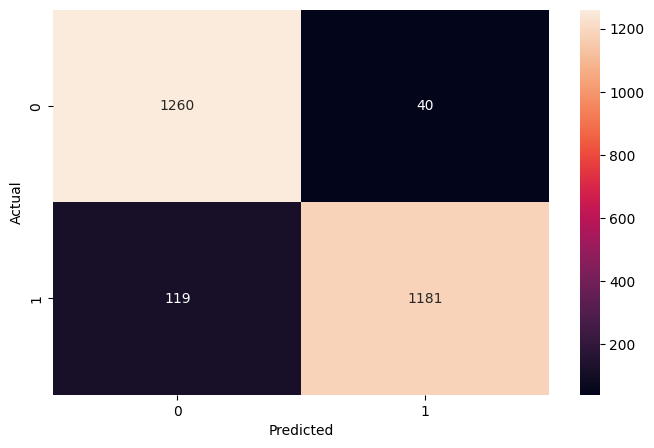

In [ ]:
# Print classification report
print(classification_report(np.argmax(Y_test, axis = 1), np.argmax(prediction,axis = 1)))

# Heatmap with confusion matrix
cm = confusion_matrix(np.argmax(Y_test,axis = 1), np.argmax(prediction,axis = 1))
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = np.array([0,1]), yticklabels = np.array([0,1]))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

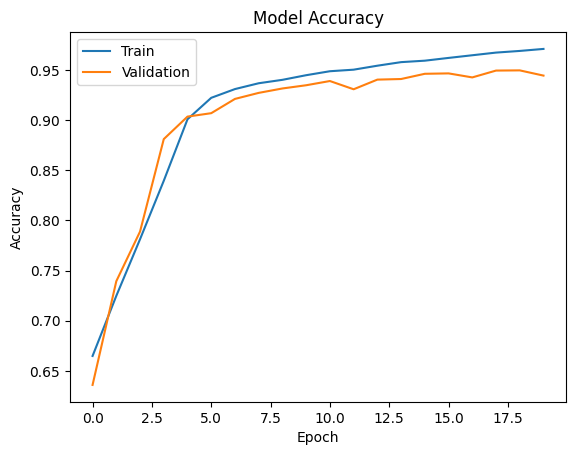

In [ ]:
# Plot showing accuracies of training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

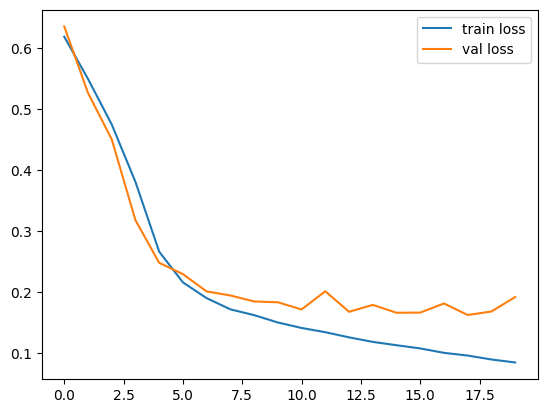

In [ ]:

# Plot the loss curve
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_1 = Sequential([
    # Normalize input
    Rescaling(1./255, input_shape=(224, 224, 3)),

    # Convolutional Layer 1
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    # Convolutional Layer 2
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    # Convolutional Layer 3
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),

    # FULLY CONNECTED NEURAL NETWORK
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),

    # Output Layer
    Dense(2, activation="softmax")
])

###<b> Building the Model

###<b> Compiling the model

In [ ]:
# Compile model 1
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 32)       

<b> Using Callbacks

In [ ]:
# Early stopping callback to prevent overfitting
callback_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3, start_from_epoch=10)


<b>Fit and Train the model

In [ ]:
# Fit training dataset into the model
epochs = 20
history_1 = model_1.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=epochs,
    callbacks=[callback_1]
)

Epoch 1/20
624/624 [==============================] - 18s 25ms/step - loss: 0.5607 - accuracy: 0.7060 - val_loss: 0.4195 - val_accuracy: 0.8027
Epoch 2/20
624/624 [==============================] - 14s 23ms/step - loss: 0.2782 - accuracy: 0.8870 - val_loss: 0.1848 - val_accuracy: 0.9293
Epoch 3/20
624/624 [==============================] - 14s 23ms/step - loss: 0.1572 - accuracy: 0.9426 - val_loss: 0.1475 - val_accuracy: 0.9485
Epoch 4/20
624/624 [==============================] - 14s 23ms/step - loss: 0.1310 - accuracy: 0.9549 - val_loss: 0.1360 - val_accuracy: 0.9537
Epoch 5/20
624/624 [==============================] - 14s 22ms/step - loss: 0.1170 - accuracy: 0.9585 - val_loss: 0.1349 - val_accuracy: 0.9527
Epoch 6/20
624/624 [==============================] - 14s 22ms/step - loss: 0.1036 - accuracy: 0.9643 - val_loss: 0.1236 - val_accuracy: 0.9565
Epoch 7/20
624/624 [==============================] - 14s 22ms/step - loss: 0.0956 - accuracy: 0.9659 - val_loss: 0.1203 - val_accuracy:

###<b> Evaluating the model

In [ ]:
# Make predictions on test dataset
predictions_1 = model_1.predict(X_test)

82/82 [==============================] - 1s 7ms/step


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1300
           1       0.97      0.95      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



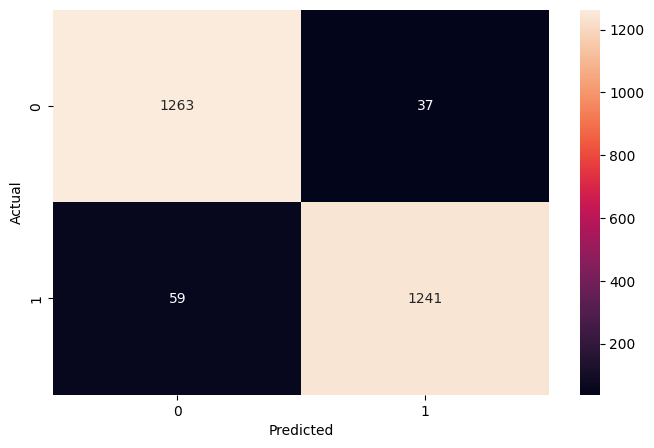

In [ ]:
# Print classification report
print(classification_report(np.argmax(Y_test, axis = 1), np.argmax(predictions_1, axis = 1)))

# Heatmap with confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis = 1), np.argmax(predictions_1, axis = 1))
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = np.array([0,1]), yticklabels = np.array([0,1]))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the train and the validation curves

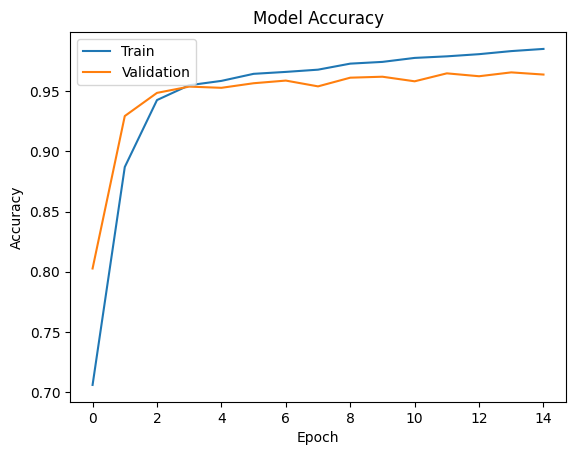

In [ ]:
# Plot showing accuracies of training and validation
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

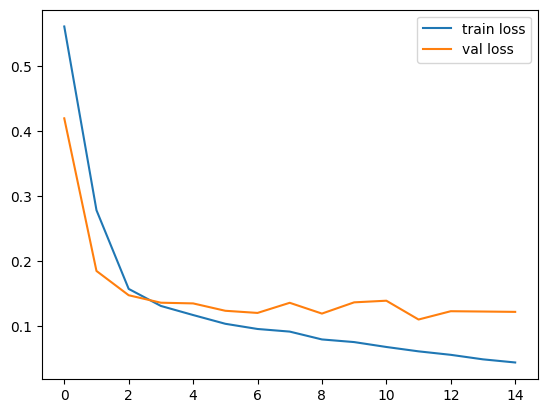

In [ ]:
# Plot the loss curve
plt.plot(history_1.history['loss'], label='train loss')
plt.plot(history_1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

###<b> Building the Model

In [ ]:
LeakyReLU = tf.keras.layers.LeakyReLU(alpha=0.01)
model_2 = Sequential([
    # Normalize input
    Rescaling(1./255, input_shape=(224, 224, 3)),

    # Convolutional Layer 1
    Conv2D(16, 3, padding='same', activation=LeakyReLU),
    MaxPooling2D(),

    # Convolutional Layer 2
    Conv2D(32, 3, padding='same', activation=LeakyReLU),
    MaxPooling2D(),

    # Convolutional Layer 3
    Conv2D(32, 3, padding='same', activation=LeakyReLU),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),

    # FULLY CONNECTED NEURAL NETWORK
    Dense(64, activation=LeakyReLU),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation=LeakyReLU),
    BatchNormalization(),

    # Output Layer
    Dense(2, activation="softmax")
])

###<b>Compiling the model

In [ ]:
# Compiing model 2
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 32)       

<b> Using callbacks

In [ ]:
# Early stopping callback to prevent overfitting
callback_2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3, start_from_epoch=10)


<b>Fit and train the model

In [ ]:
# Fit training dataset into model for training
epochs = 20
history_2 = model_2.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=epochs,
    callbacks=[callback_2]
)

Epoch 1/20
624/624 [==============================] - 33s 45ms/step - loss: 0.5689 - accuracy: 0.7224 - val_loss: 0.5828 - val_accuracy: 0.6987
Epoch 2/20
624/624 [==============================] - 27s 43ms/step - loss: 0.2738 - accuracy: 0.8915 - val_loss: 0.3154 - val_accuracy: 0.8932
Epoch 3/20
624/624 [==============================] - 26s 42ms/step - loss: 0.1797 - accuracy: 0.9355 - val_loss: 0.1637 - val_accuracy: 0.9441
Epoch 4/20
624/624 [==============================] - 26s 42ms/step - loss: 0.1463 - accuracy: 0.9507 - val_loss: 0.1717 - val_accuracy: 0.9457
Epoch 5/20
624/624 [==============================] - 26s 42ms/step - loss: 0.1204 - accuracy: 0.9592 - val_loss: 0.1554 - val_accuracy: 0.9525
Epoch 6/20
624/624 [==============================] - 26s 42ms/step - loss: 0.0948 - accuracy: 0.9678 - val_loss: 0.1468 - val_accuracy: 0.9577
Epoch 7/20
624/624 [==============================] - 26s 42ms/step - loss: 0.0782 - accuracy: 0.9745 - val_loss: 0.1439 - val_accuracy:

<b>Plotting the train and validation accuracy

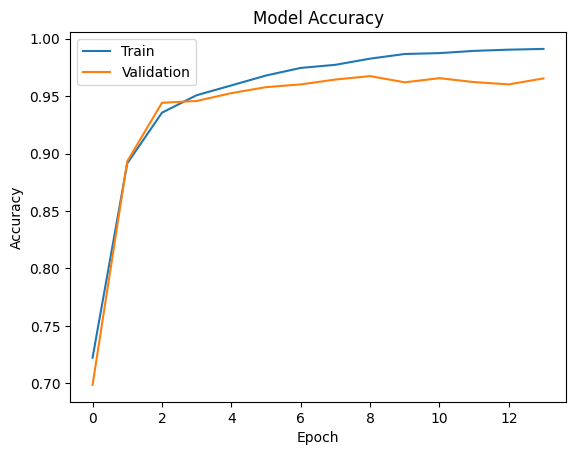

In [ ]:
# Plot showing accuracies of training and validation
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()


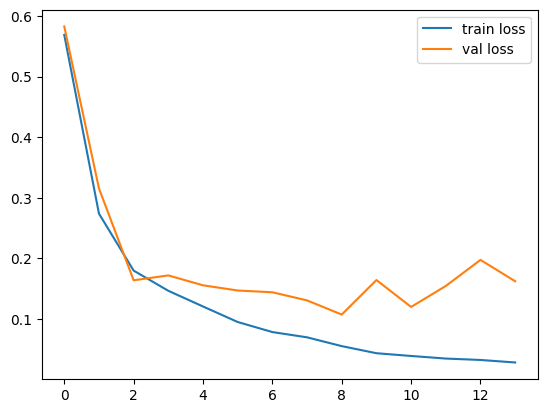

In [ ]:
# Plot the loss curve
plt.plot(history_2.history['loss'], label='train loss')
plt.plot(history_2.history['val_loss'], label='val loss')
plt.legend()
plt.show()

###<b>Evaluating the model

In [ ]:
# Make predictions on test dataset
predictions_2 = model_2.predict(X_test)

82/82 [==============================] - 1s 11ms/step


####<b>Observations and insights: ____
In Model 2, batch normalization was added to some of the layers, both convolutional and fully connected neural network, also LeakyReLU was chosen as the activation function. The batch normalization would help mitigate vanishing and exploding gradient in the network. Dropouts were also added to reduce the tendency of overfitting on the training data. There is no significant improvement in accuracy, when compared with Model 1, however this model might be preferred over the previous ones because of the batch normalization layers and dropout layers included in the network.


<b> Generate the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1300
           1       0.99      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



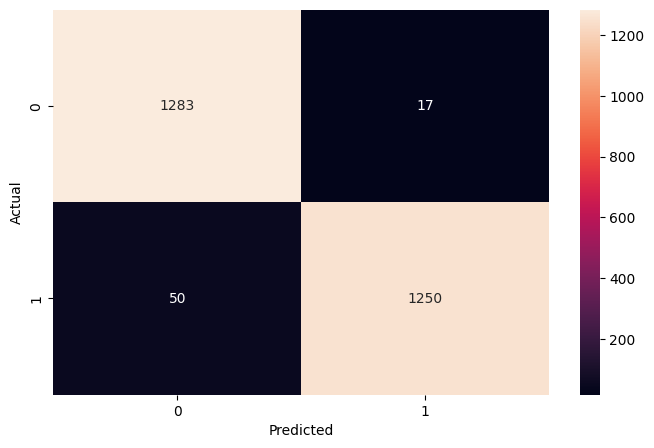

In [ ]:
# Print classification report
print(classification_report(np.argmax(Y_test, axis = 1), np.argmax(predictions_2,axis = 1)))

# Heatmap with confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis = 1), np.argmax(predictions_2, axis = 1))
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = np.array([0,1]), yticklabels = np.array([0,1]))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
#  Get 20% of train and test data for Augumentation
# Pick twenty percent of the dataset for augmentation
twenty_percent_train = int(len(X_train) * 0.2)
X_train_sample = X_train_gaussian[:twenty_percent_train]
Y_train_sample = Y_train[:twenty_percent_train]

twenty_percent_test = int(len(X_test) * 0.2)
X_test_sample = X_test_gaussian[:twenty_percent_test]
Y_test_sample = Y_test[:twenty_percent_test]

###<b> Use image data generator

In [ ]:
# Function for applying few augmentation
aug_seed = (3, 5)
def augment_images(images, seed = aug_seed):
    images = tf.image.random_flip_left_right(images)
    images = tf.image.random_flip_up_down(images)
    return images

# Augment data
X_train_aug = augment_images(X_train_sample)
X_test_aug = augment_images(X_test_sample)


###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

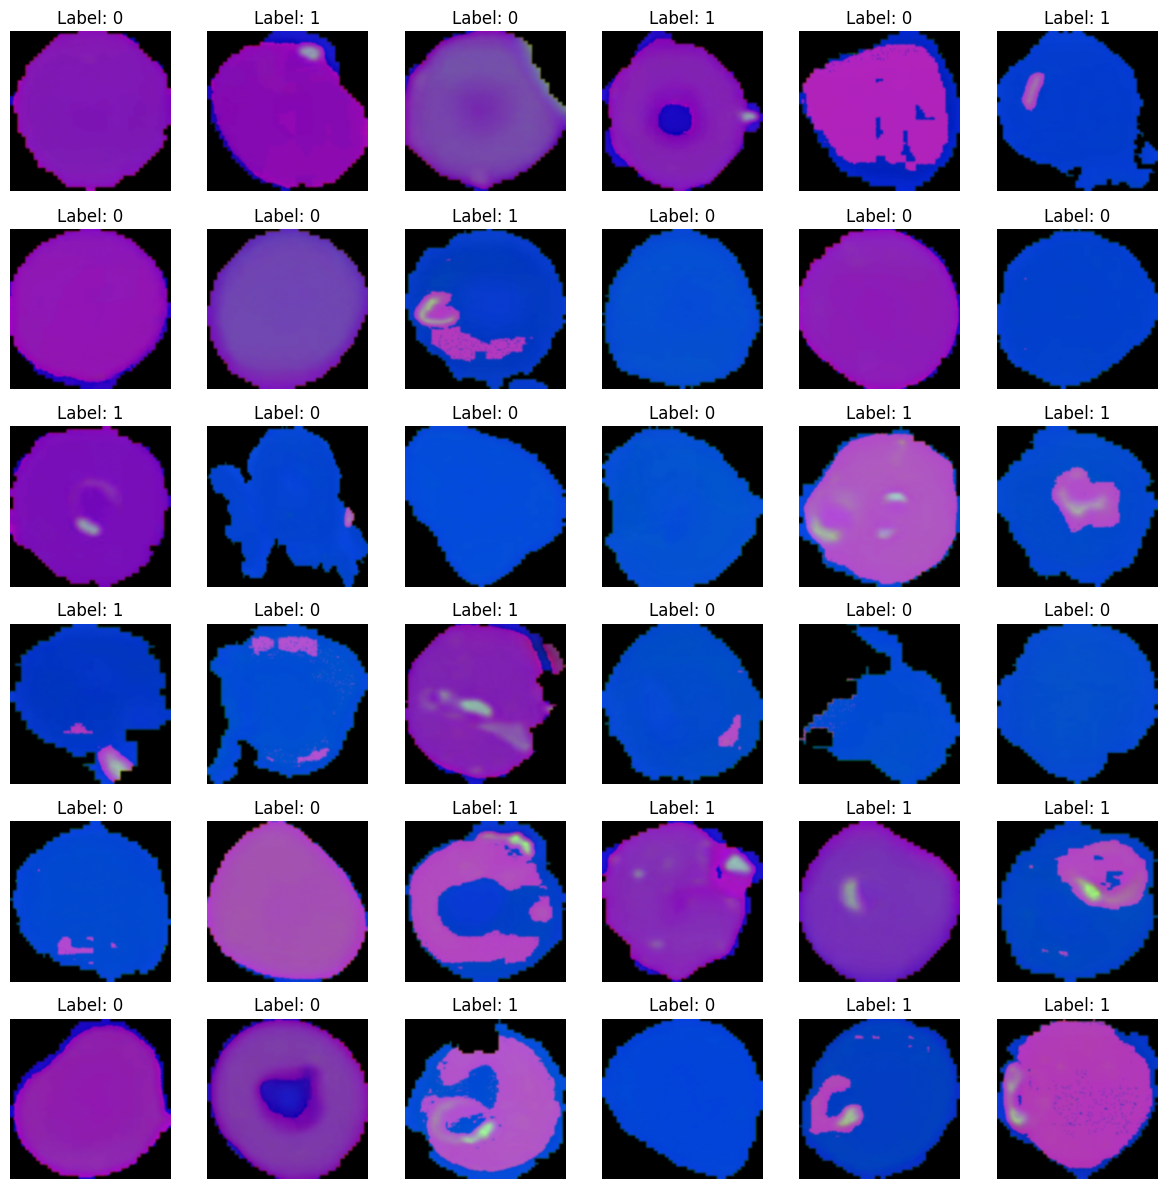

In [ ]:
# Set up the figure with the desired size
fig, axes = plt.subplots(6, 6, figsize=(12, 12))

# Flatten the axes array so that we can easily iterate over it
axes = axes.flatten()

# Loop through each image and display it
for i, ax in enumerate(axes):
    # Plot the image
    ax.imshow(X_train_aug[i])
    ax.set_title(f"Label: {np.argmax(Y_train_sample[i])}",)

    # Hide the axes
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


####<b>Observations and insights: ____
The images have been augmented, some have been flipped, rotated to boost the generalization of the model

###<b>Building the Model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
LeakyReLU = tf.keras.layers.LeakyReLU(alpha=0.01)
model_3 = Sequential([
    # Normalize input
    Rescaling(1./255, input_shape=(224, 224, 3)),

    # Convolutional Layer 1
    Conv2D(16, 3, padding='same', activation=LeakyReLU),
    MaxPooling2D(),

    # Convolutional Layer 2
    Conv2D(32, 3, padding='same', activation=LeakyReLU),
    MaxPooling2D(),

    # Convolutional Layer 3
    Conv2D(32, 3, padding='same', activation=LeakyReLU),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),

    # FULLY CONNECTED NEURAL NETWORK
    Dense(256, activation=LeakyReLU),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation=LeakyReLU),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation=LeakyReLU),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation=LeakyReLU),
    BatchNormalization(),
    Dropout(0.2),

    # Output Layer
    Dense(2, activation="softmax")
])

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9

<b>Using Callbacks

In [ ]:
# Earlystopping callback
callback_3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3, start_from_epoch=10)


<b> Fit and Train the model

In [ ]:
# Merge augmented training data with training data
X_train_merged = np.concatenate((X_train, X_train_aug.numpy()), axis=0)
Y_train_merged = np.concatenate((Y_train, Y_train_sample), axis=0)

# Merge augmented test data with test data
X_test_merged = np.concatenate((X_test, X_test_aug.numpy()), axis=0)
Y_test_merged = np.concatenate((Y_test, Y_test_sample), axis=0)

In [ ]:
# Fit training dataset into model 3
epochs = 20
history_3 = model_3.fit(
    X_train_merged,
    Y_train_merged,
    validation_split=0.2,
    epochs=epochs,
    shuffle=True

)

Epoch 1/20
749/749 [==============================] - 45s 49ms/step - loss: 0.6389 - accuracy: 0.6918 - val_loss: 0.6564 - val_accuracy: 0.7299
Epoch 2/20
749/749 [==============================] - 34s 45ms/step - loss: 0.3160 - accuracy: 0.8748 - val_loss: 0.2656 - val_accuracy: 0.9098
Epoch 3/20
749/749 [==============================] - 34s 45ms/step - loss: 0.2199 - accuracy: 0.9233 - val_loss: 0.1922 - val_accuracy: 0.9357
Epoch 4/20
749/749 [==============================] - 34s 45ms/step - loss: 0.1855 - accuracy: 0.9363 - val_loss: 0.1323 - val_accuracy: 0.9541
Epoch 5/20
749/749 [==============================] - 34s 45ms/step - loss: 0.1583 - accuracy: 0.9475 - val_loss: 0.1180 - val_accuracy: 0.9593
Epoch 6/20
749/749 [==============================] - 34s 45ms/step - loss: 0.1406 - accuracy: 0.9535 - val_loss: 0.1111 - val_accuracy: 0.9644
Epoch 7/20
749/749 [==============================] - 34s 45ms/step - loss: 0.1190 - accuracy: 0.9617 - val_loss: 0.1207 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

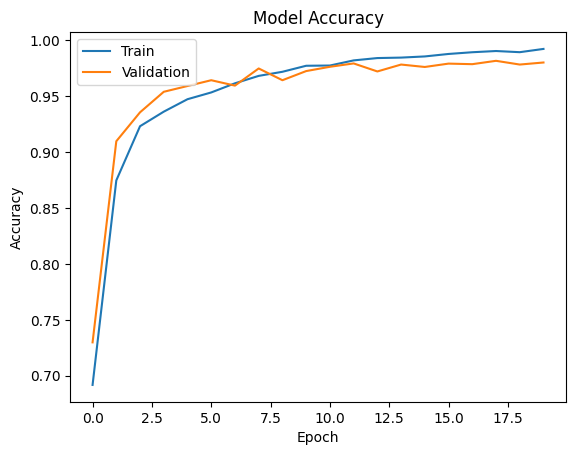

In [ ]:
# Plot showing accuracies of training and validation
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()


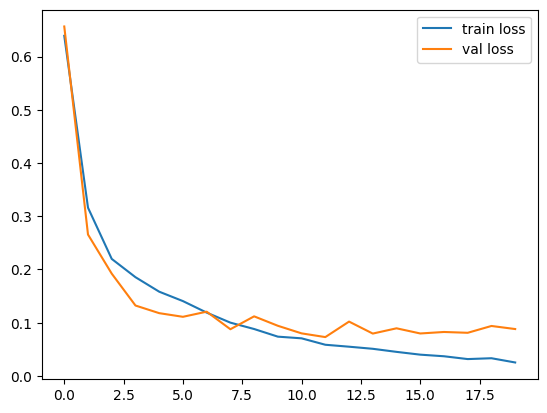

In [ ]:
# Plot the loss curve
plt.plot(history_3.history['loss'], label='train loss')
plt.plot(history_3.history['val_loss'], label='val loss')
plt.legend()
plt.show()

<B>Plotting the classification report and confusion matrix

In [ ]:
# Make predictions on augmented test dataset
predictions_3 = model_3.predict(X_test_merged)

98/98 [==============================] - 1s 12ms/step


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1300
           1       0.98      0.98      0.98      1820

    accuracy                           0.98      3120
   macro avg       0.98      0.98      0.98      3120
weighted avg       0.98      0.98      0.98      3120



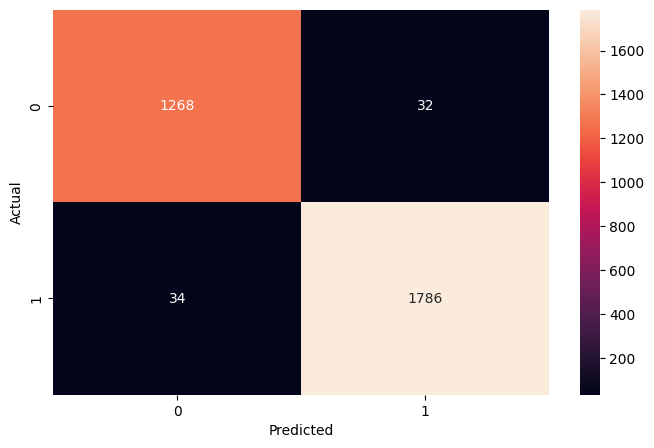

In [ ]:
# Print classification report
print(classification_report(np.argmax(Y_test_merged, axis = 1), np.argmax(predictions_3,axis = 1)))

# Heatmap with confusion matrix
cm = confusion_matrix(np.argmax(Y_test_merged, axis = 1), np.argmax(predictions_3, axis = 1))
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = np.array([0,1]), yticklabels = np.array([0,1]))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
tf.keras.backend.clear_session()

###<b>Compiling the model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


# Load the pre-trained VGG16 model without the top fully-connected layers
vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in vgg_base_model.layers:
    layer.trainable = False

# Add custom fully connected layers on top
# FULLY CONNECTED NEURAL NETWORK
x = Flatten()(vgg_base_model.output)

x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(2, activation='softmax')(x)

# Create the final model
model_4 = Model(inputs=vgg_base_model.input, outputs=predictions)

# Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

<b> using callbacks

In [ ]:
callback_4 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3, start_from_epoch=10)


<b>Fit and Train the model

In [ ]:
# Fit data into model
epochs = 20
history_4 = model_4.fit(
    X_train_merged,
    Y_train_merged,
    validation_split=0.2,
    epochs=epochs,
    callbacks=[callback_4]
)

Epoch 1/20
749/749 [==============================] - 135s 165ms/step - loss: 0.5896 - accuracy: 0.7687 - val_loss: 0.2755 - val_accuracy: 0.8927
Epoch 2/20
749/749 [==============================] - 116s 155ms/step - loss: 0.2929 - accuracy: 0.8918 - val_loss: 0.2768 - val_accuracy: 0.8957
Epoch 3/20
749/749 [==============================] - 116s 155ms/step - loss: 0.2260 - accuracy: 0.9173 - val_loss: 0.2748 - val_accuracy: 0.9000
Epoch 4/20
749/749 [==============================] - 116s 155ms/step - loss: 0.1869 - accuracy: 0.9336 - val_loss: 0.2943 - val_accuracy: 0.8955
Epoch 5/20
749/749 [==============================] - 116s 155ms/step - loss: 0.1617 - accuracy: 0.9413 - val_loss: 0.2815 - val_accuracy: 0.9018
Epoch 6/20
749/749 [==============================] - 116s 155ms/step - loss: 0.1498 - accuracy: 0.9454 - val_loss: 0.2683 - val_accuracy: 0.9048
Epoch 7/20
749/749 [==============================] - 116s 155ms/step - loss: 0.1278 - accuracy: 0.9538 - val_loss: 0.2419 -

<b>Plot the train and validation accuracy

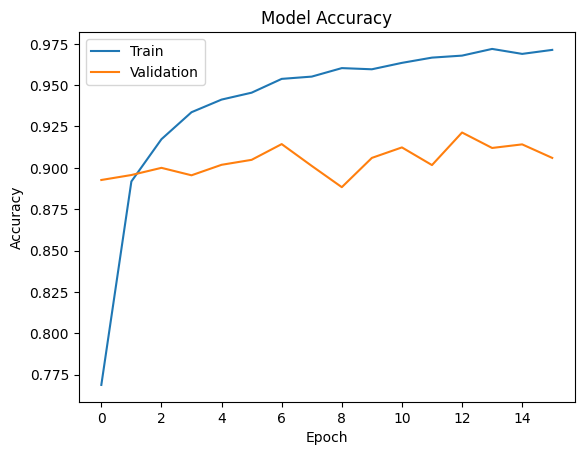

In [ ]:
# Plot showing accuracies of training and validation
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()


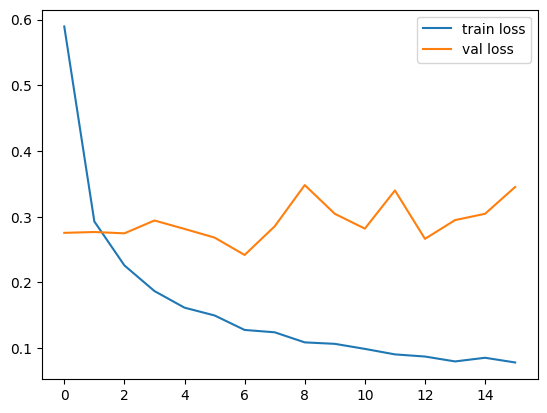

In [ ]:
# Plot the loss curve
plt.plot(history_4.history['loss'], label='train loss')
plt.plot(history_4.history['val_loss'], label='val loss')
plt.legend()
plt.show()

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

The validation curve appears to have a gentle (almost flat) slope compared to the train curve, this might be attributed to the fact that the model is pre-trained. The validation accuracy is not so far from the training accuracy, hence the model might not be seen as overfitting.

###<b> Evaluating the model

In [ ]:
# Make predictions
preds_4 = model_4.predict(X_test_merged)

98/98 [==============================] - 15s 156ms/step


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1300
           1       0.94      0.96      0.95      1820

    accuracy                           0.95      3120
   macro avg       0.95      0.94      0.94      3120
weighted avg       0.95      0.95      0.95      3120



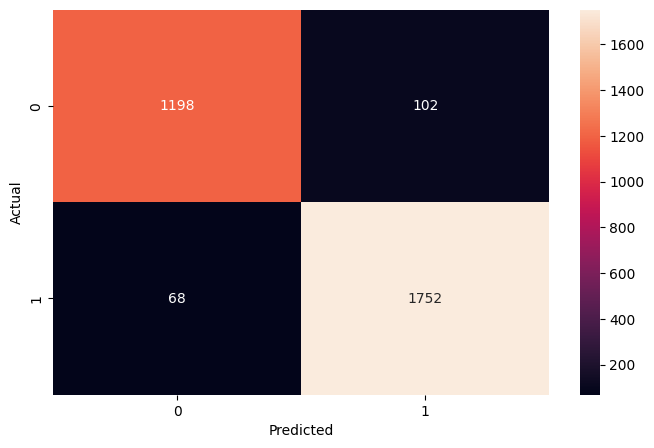

In [ ]:
# Print classification report
print(classification_report(np.argmax(Y_test_merged, axis = 1), np.argmax(preds_4,axis = 1)))

# Heatmap with confusion matrix
cm = confusion_matrix(np.argmax(Y_test_merged, axis = 1), np.argmax(preds_4, axis = 1))
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = np.array([0,1]), yticklabels = np.array([0,1]))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.




*   The Confusion matrix shows that most of the data were correctly classified, it also shows that there are more data for the parasitized class than uninfected class. The classification report shows that the performance of the model on the test data is 95%.
*   Model 3 is chosen as the final model because it outperforms its peers on accuracy and it is trained on additional augmented data.



In [ ]:
# Final Model
model_3.save('model_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


####<b> Observations and Conclusions drawn from the final model: _____
Model 3 is trained on additional augmented data, to improve its generalization performance on unseen data. This model clearly will perform better than the previous models in the face of varying unseen data, because it is trained on more data, which were augmented. It also has dropout and batch normalization layers to reduce tendency of overfitting.


**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.



*   There probably could be an accuracy gain, when another pre-trained model such as ResNet is used over VGG. But it might likely come at a greater computational cost. Hence why a simpler CNN might be preferred in this case, with the availability of more augmented data, because other simpler CNN models have been proven to predict with high accuracy on unseen data.




#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?



The most meaningful insight from the data relevant to the problem is: more data will make a robust model  achievable.



BASE MODEL
Training accuracy: 97.09%
Validation accuracy: 94.43%
Test accuracy: 94%

The base model is relatively simple consisting 2 convolutional layers and 1 fully connected neural network layer, the performance of the model at training was 97.09% while validation accuracy was 94.43%, which indicates that the base model is likely not overfitting. The base model performs surprisingly well on the unseen test data, it had a performance of 94% on the test data.

MODEL 1
Training accuracy: 98.5%
Validation accuracy: 96.37%
Test accuracy: 96%

In an attempt to increase the accuracy of the model performance, more layers were added to the network, 1 more layer was added to the convolutional layers, making it 3 layers, also 1 layer was added to the fully connected neural network making it 2 layers. The model accuracy increased significantly, to a score of 98.5% in training accuracy, 96.37% in validation accuracy. Model 1 also performed well on the unseen test data, with an accuracy of 96%.

MODEL 2
Training accuracy: 99.10%
Validation accuracy: 96.53%
Test accuracy: 97%

In Model 2, batch normalization was added to some of the layers, both convolutional and fully connected neural network, also LeakyReLU was chosen as the activation function. The batch normalization would help mitigate vanishing and exploding gradient in the network. Dropouts were also added to reduce the tendency of overfitting on the training data. There is no significant improvement in accuracy, when compared with Model 1, however this model might be preferred over the previous ones because of the batch normalization layers and dropout layers included in the network.

MODEL 3
Training accuracy: 99.24%
Validation accuracy: 98.03%
Test accuracy: 98%

Model 3 is trained on additional augmented data, to improve its generalization performance on unseen data. This model clearly will perform better than the previous models in the face of varying unseen data, because it is trained on more data, which were augmented.

PRE-TRAINED MODEL (VGG16)
Training accuracy: 97.13%
Validation accuracy: 90.60%
Test accuracy: 95%

The pretrained model performed fairly but did not perform better than most previous models that have been evaluated in this task. The pretrained model also required more computational resource to train.




Model 3 is the preferred model simply because it is relatively simple when compared to the pre-trained option, also because it is trained on augmented data which gives it an advantage over model 2. It is also better than Model 1 and the base model because it includes batch normalization and dropouts, which curb overfittng in the model.

## Exexcutive Summary

- Model 3 has the best performance, when compared with other models in this analysis.
- Model 3 has 3 convolutional layers, 4 hidden layers, LeakyReLU activation function, implements batch normalization and dropouts.
- Model 3 is trained on augmented data, also implements early stopping in training to curb overfitting.
- Simpler CNN models can outperform some open source pre-trained models, simply because most pre-trained models are trained on other kinds of image data.

## Recommendations for implementation

The key recommendation for the stakeholders are:
- Set up data infrastructure to gather and preprocess data, also set up infrastructure model training, evaluation and inference.
- Provide more malaria cells dataset, possibly from other sources, so as to develop more robust models.